In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ncx2, chi2, multivariate_normal
from scipy.spatial import distance
from scipy.linalg import fractional_matrix_power
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 

# import xarray as xr


In [66]:
N = 150
X = np.linspace(3, 5, N)
Y = np.linspace(1, 2, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
F = multivariate_normal(u, C)
Z = F.pdf(pos)
Z.shape

[[3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]
 [3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]
 [3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]
 ...
 [3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]
 [3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]
 [3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]]


(150, 150)

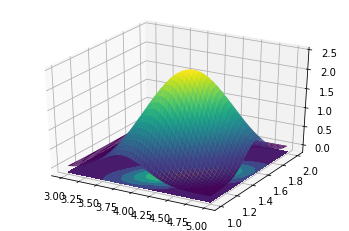

In [40]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)
ax.set_zlim(-0.15,2.5)
plt.show()

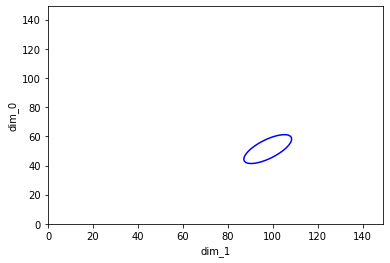

In [59]:
Z =  xr.DataArray(F.pdf(pos))
kw = {'levels':[2.4], 'colors':['b']}
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
# Z.plot.contour(ax=ax1, **kw)
Z.plot.contour(**kw)
# ax2.contour(Z.values, cmap = 'jet')
# plt.show()

In [64]:
Z.values[3, 1]

0.02323706298701713

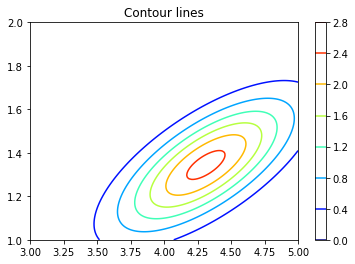

[[3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]
 [3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]
 [3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]
 ...
 [3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]
 [3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]
 [3.         3.01342282 3.02684564 ... 4.97315436 4.98657718 5.        ]]


In [42]:
plt.contour(X, Y, Z.values, cmap = 'jet')
plt.colorbar()
plt.title('Contour lines')
plt.show()
print(X)



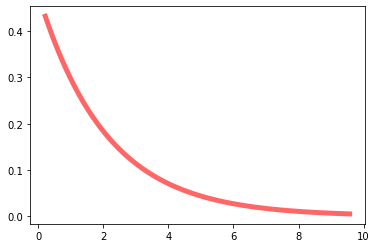

In [118]:
fig, ax = plt.subplots(1, 1)
df, nc = 2, 2/25
x = np.linspace(ncx2.ppf(0.10, df, nc), ncx2.ppf(0.99, df, nc), 100)
ax.plot(x, ncx2.pdf(x, df, nc),
       'r-', lw=5, alpha=0.6, label='ncx2 pdf')

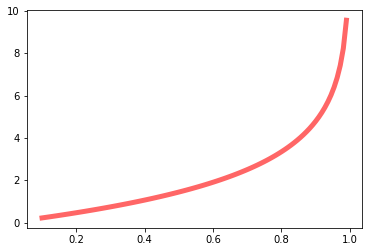

In [119]:
fig, ax = plt.subplots(1, 1)
q = np.linspace(0.10, 0.99, 100)
ax.plot(q, ncx2.ppf(q, df, nc),
       'r', lw=5, alpha=0.6, label='ncx2 quantile')

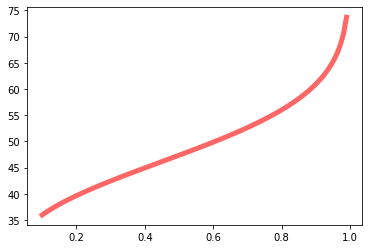

In [126]:
fig, ax = plt.subplots(1, 1)
N = 25
D = 2
df = (N-1)*D
q = np.linspace(0.10, 0.99, 100)
ax.plot(q, chi2.ppf(q, df),
       'r', lw=5, alpha=0.6, label='X2 quantile')

In [2]:
#Read data
data = pd.read_csv("./iris.data", header=None)
data = data.drop([0, 1], axis=1) #Only intersted in cols 3 & 4

In [3]:
data 

,2,3,4
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [9]:
#Get normal class data
idx = data.index[data[4] == 'Iris-versicolor'].tolist()
data_Versicolor = data.loc[idx]
# print(data_Versicolor)
data_Versicolor = data_Versicolor.drop([4], axis=1) #drop the label 
# print(computeMean(data_Versicolor[0:10]))


[4.37 1.38]


In [8]:
idx = data.index[data[4] == 'Iris-setosa'].tolist()
data_Setosa = data.loc[idx]
# print(data_Setosa)
data_Setosa = data_Setosa.drop([4], axis=1) #drop the label
# print(computeMean(data_Setosa[0:10]))


[1.45 0.22]


In [12]:
idx = data.index[data[4] == 'Iris-virginica'].tolist()
data_Virginica = data.loc[idx]
# print(data_virginica)
data_Virginica = data_Virginica.drop([4], axis=1) #drop the label 
# print(computeMean(data_Virginica[0:10]))


[5.77 2.04]


In [11]:
#Split into sets
trn_data = data_Versicolor[0:25]
tst_data = data_Versicolor[25:50]

In [7]:
trn_data.sum(axis=0).values

array([107.8,  33.6])

In [14]:
u = computeMean(trn_data)
print("Estimated mean vector:")
print(u.reshape((2,1)))

Estimated mean vector:
[[4.312]
 [1.344]]


In [15]:
C = computeCov(trn_data, u)
print('Estimated Covariance matrix:')
print(C)
# trn_data.values[0]

Estimated Covariance matrix:
[[0.189056 0.061472]
 [0.061472 0.040864]]


In [16]:
tolerance_radius(0.1, 0.9, 25, 2)
# N*D*ncx2.ppf(0.1, 2, 0.08)

0.5522951812575759

In [9]:
def tolerance_radius(p, gamma, N, D):
    df_cnx2 = D
    df_x2 = (N-1)*D
    nc = D/N #Non centrality param
    return np.sqrt(N*D*ncx2.ppf(p, df_cnx2, nc)/(chi2.ppf((1-gamma), df_x2)))


In [17]:
mahalanobis_dist(trn_data.values[0], u, C)

1.0159124062962064

In [10]:

def mahalanobis_dist(x, u, C):
    C_inv = np.linalg.inv(C)
    y = (x-u).reshape((1,2))
    i = y.dot(C_inv)
    return float(np.sqrt(i.dot(y.T)))


In [133]:
# trn_data

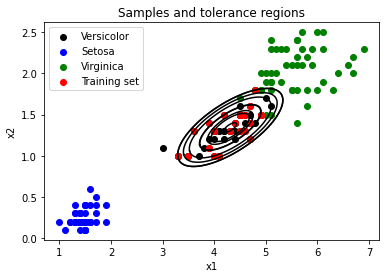

In [20]:


N = 25
D = 2
gamma = 0.99
tol_rs = np.array([])


vs_plot = plt.scatter(data_Versicolor.values[:,0], data_Versicolor.values[:,1], label="Versicolor", c='black')
st_plot =plt.scatter(data_Setosa.values[:,0], data_Setosa.values[:,1], label="Setosa",  c='blue')
vr_plot = plt.scatter(data_Virginica.values[:,0], data_Virginica.values[:,1], label="Virginica",  c='green')
# trn_plot = plt.scatter(R[:,0], R[:,1], label="Training set", c='r')
# plt.legend(handles=[vs_plot, st_plot, vr_plot, trn_plot])

for p in np.arange(0.1, 1, 0.1):
    max_R = -1
    R = np.empty((0,2), float)
    tol_rad = tolerance_radius(p, gamma, N, D)   
    for n in range(1, N):
        x = trn_data.values[n]
        mhnbs_dist = mahalanobis_dist(x, u, C)
        if (mhnbs_dist <= tol_rad):
            x = x.reshape((1,2))
            R = np.append(R, x, axis=0)
            if (mhnbs_dist > max_R): #to find the farthest point from mean for a given p% tolerace
                farthest_point = x
                max_R = mhnbs_dist

    # tol_rs = np.append(tol_rs, max_R)

    x_t = get_ellipse(max_R, C, u)
    plt.plot(x_t[:,0], x_t[:,1], c='black')
# plt.scatter(R[:,0], R[:,1], c='r')
trn_plot = plt.scatter(R[:,0], R[:,1], label="Training set", c='r')
plt.legend(handles=[vs_plot, st_plot, vr_plot, trn_plot])
plt.title('Samples and tolerance regions')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Based on the observed data distribution, the model will have a reasonable performance for discriminating between Versicolor (Normal) class and the 2 other classes. Given the small number of training samples however, the tolerance regions are not entirely accurate and might be larger than the actual probability regions. The Setosa class is a clear outlier and all of its samples will be accurately labeled as abnormal. Some Virginica samples however have been included in the tolerance region, and some false negative misclassication can be expected for the Virginica class. There is also one normal class sample that is an outlier and the model will have a false positive (Type 1) error on the classification of this sample.

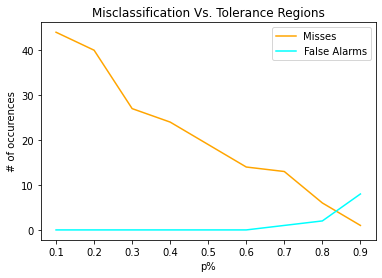

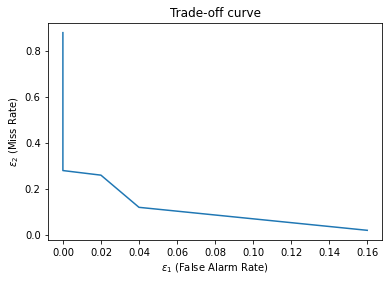

In [29]:
y = data[4].values
# y_hat = np.array([])
N = 150
val_data =  data.drop([4], axis=1) #drop the label

MR = np.array([])
FAR = np.array([])
# val_data.values
for p in np.arange(0.1, 1, 0.1):
    y_hat = np.array([])
    max_R = -1
    R = np.empty((0,2), float)

    m = 0 #misses
    fa = 0 #false alarms

    tol_rad = tolerance_radius(p, gamma, N, D)   
    for n in range(0, N):
        x = val_data.values[n]
        mhnbs_dist = mahalanobis_dist(x, u, C)
        if (mhnbs_dist <= tol_rad):
            y_hat = np.append(y_hat, 'Iris-versicolor')
            if (y[n] != 'Iris-versicolor'):
                fa += 1
        else:
            y_hat = np.append(y_hat, 'Abnormal')
            if (y[n] == 'Iris-versicolor'):
                m += 1

    MR = np.append(MR, m)
    FAR = np.append(FAR, fa)

    # print(MR)
    # print(FAR)
p = np.arange(0.1, 1, 0.1)
plt.plot(p, MR, label="Misses",  c='orange')
plt.plot(p, FAR, label="False Alarms", c='cyan')
plt.xlabel('p%')
plt.ylabel('# of occurences')
plt.title('Misclassification Vs. Tolerance Regions')
plt.legend()
plt.show()

plt.plot(FAR/50, MR/50)
plt.xlabel('$\epsilon_1$ (False Alarm Rate)')
plt.ylabel('$\epsilon_2$ (Miss Rate)')
plt.title('Trade-off curve')
plt.show()
# plt.plot(p, FAR, label="False Alarm Rate", c='cyan')

As the tolerance region is reduced so is $\epsilon_1$, but $\epsilon_2$ is increased and vice-versa. One error is traded-off for the other and they cannot both simultaneously be 0. Observing the previous tolerance region figure, this trade off curve makes sense. As one would expect from looking at the data, for a smaller tolerance region most samples are exluded from the region. This means that the classifier does a good job of avoiding false alarms at the cost of also having a high miss rate. And as we increase the tolerance region more and more samples are included, meaning that there are less misses, but the classifier also includes samples that are not from the normal class it was trained on, thus increasing the false alarm rate.

Assuming that the data is MVG distributed. We can use MLE to estimate the parameters of the MVG. We know that solving the MLE for the MVG parameters we find:
$$
\begin{equation*}
\hat{\mu}_{MLE} \equiv \hat{\mu}\\
\hat{C}_{MLE} \equiv \hat{C}\\
\end{equation*}
$$
Then we can compute $\hat{\mu}_{MLE}$ as:
$$
\hat{\mu}_{MLE} = \frac{1}{N}\sum_{n=1}^{N}\overrightarrow{x_n}
$$

In [5]:
def computeMean(X):
    N = X.shape[0]
    mean = X.sum(axis=0).values/N
    return mean


In [31]:
def get_ellipse(r, C, u):

    A = np.linalg.inv(C)
    lmda, V = np.linalg.eig(A)
    L = np.diag(lmda)
    B = V.dot(fractional_matrix_power(L, -0.5))

    x_t = np.empty((0,2), float)
    # print(x_t.shape)
    for t in np.linspace(0, 2*np.pi, 100):
        unit = np.array([np.cos(t), np.sin(t)])
        u = u.reshape((2,1))
        unit = unit.reshape((2,1))
        temp_x_t = r*B.dot(unit) + u
        temp_x_t = temp_x_t.reshape((1,2))
        x_t = np.append(x_t, (temp_x_t) , axis=0)
    
    return x_t
        # x_t = r*B.dot(unit) + u

In [30]:
def computeCov(X, u):
    X = X.values
    u = u.reshape((2,1))
    uuT = u*(u.T)
    N = X.shape[0]
    cn = np.zeros((2, 2))
    for n in range(N):
        x = X[n]
        x = x.reshape((2, 1))
        cn += x*(x.T) - uuT
    return cn/N

    